Import libraries and load dataset

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load dataset into pandas dataFrame
df = pd.read_csv("netflix.csv")

# Display first five rows of the dataset
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


Data Exploration and Preprocessing

In [3]:
# Display the number of features(columns) and observations (rows)
df.shape

(8807, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


Observations:
- The dataset contains 8807 rows and 12 columns
- Columns like "show_id", "type", "title", "director", "cast", "country", "date_added", "rating", "duration", "listed_in", and "description" having "object" datatype, which represent string values
- Column "release_year" having "integer" datatype

In [5]:
# Generate a statistical summary of numerical type data
df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


Observations:
- 25% of the total data belongs to year 1925-2013
- 25% of the total data belongs to year 2019-2021
- In overall, the range year of the movies and TV shows released starting from 1925 to 2021

In [6]:
# Generate a statistical summary of categorical type data
df.describe(include = object)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


Observations:
- "show_id" and "title" are the unique factors
- Missing values in "director", "case", "country", date_added", and "duration" columns
- "type", "rating" "country", columns needs to be changed to categorical data

In [7]:
# Check the duplicate rows
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [8]:
# Display the count of missing values for each column
df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

Handling missing values

In [9]:
# Handling null values for categorical variables
categorical_col = ['director', 'cast', 'country', 'rating']

# Filling up the missing values with "Unknown"
for column in categorical_col:
    df[column].fillna('Unknown', inplace = True)

# Filling up the missing values with "Unkown" for 'duration' column
df['duration'].fillna(0, inplace = True)


In [10]:
# Display the count of missing values for each column
df.isnull().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [11]:
# Convert 'type', 'country', and 'rating' columns to category data type
df['type'] = df['type'].astype('category')
df['country'] = df['country'].astype('category')
df['rating'] = df['rating'].astype('category')

# Convert 'date_added' column to datetime
df['date_added'] = df['date_added'].str.strip()
df['date_added'] = pd.to_datetime(df['date_added'], format="%B %d, %Y", errors="coerce")

Count of TV shows vs Movies

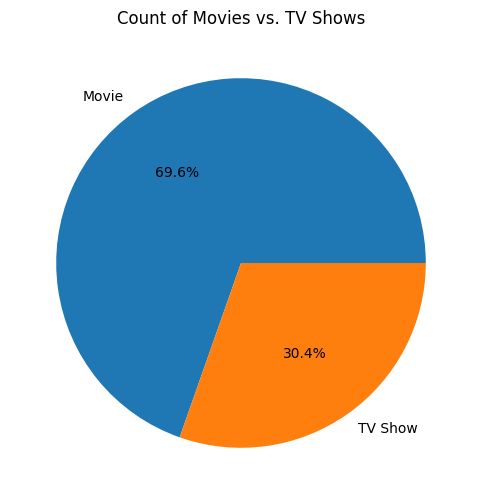

In [12]:
# Count the number of each content type
type_counts = df['type'].value_counts()

# Create pie chart 
plt.figure(figsize = (10, 6))
plt.pie(type_counts.values, labels = type_counts.index, autopct = '%1.1f%%')
plt.title('Count of Movies vs. TV Shows')
plt.show()

In [13]:
# Display the counts of each content type
type_counts

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

Observations:
- There are 6131 movies and 2676 TV shows registered and telecasted on Netflix
- Movies make up 69.6%, while TV shows contribute 30.4%

Recommendation:
- Netflix can consider introducing more TV shows to improve viewing retention

Top 10 directors with the Most Movies/TV Shows on Netflix

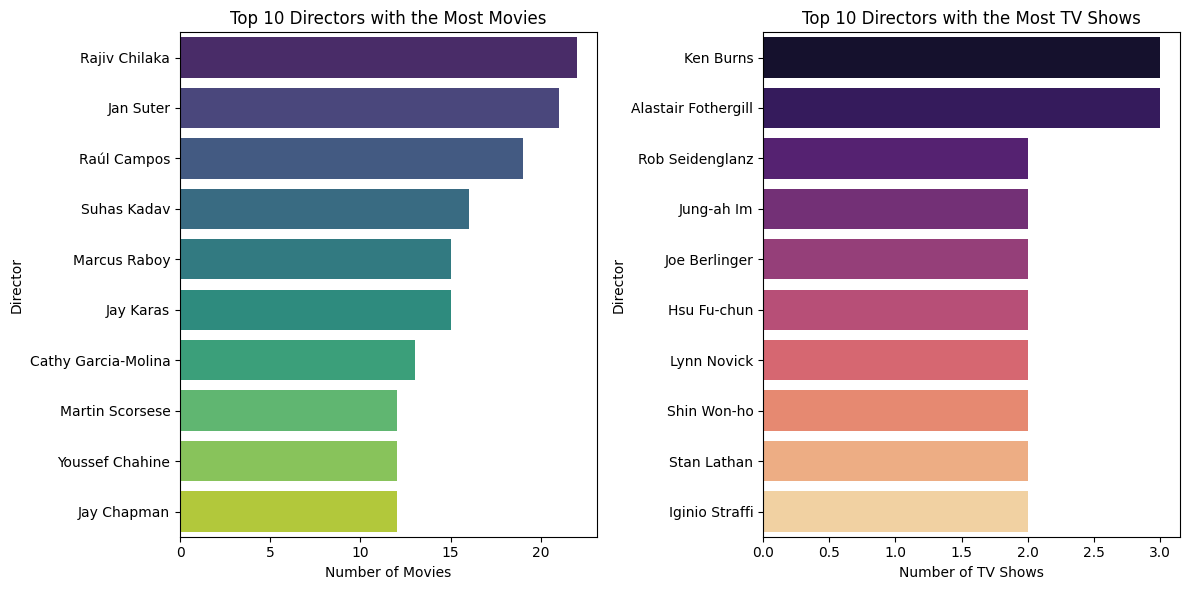

In [14]:
# Split multiple director into individual element
df['director'] = df['director'].str.split(', ')
unnested_director = df.explode('director')

# Filter out rows with 'Movies' type and 'unknown' directors
df_movies = unnested_director[(unnested_director['type'] == 'Movie') & (unnested_director['director'] != 'Unknown')]

# Count the directors and select top 10
top10_directors_movies = df_movies['director'].value_counts().head(10)

# Convert series to data frame
top10_directors_movies = top10_directors_movies.reset_index()

# Create subplot for the top 10 directors with the most movies 
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x= 'count', y= 'director', data = top10_directors_movies, hue = 'director', palette = 'viridis', legend = False)
plt.title('Top 10 Directors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Director')

# Filter out rows with 'TV Show' type and 'unknown' directors
df_tv_shows = unnested_director[(unnested_director['type'] == 'TV Show') & (unnested_director['director'] != 'Unknown')]

top10_directors_tv_shows = df_tv_shows['director'].value_counts().head(10)

top10_directors_tv_shows = top10_directors_tv_shows.reset_index()

plt.subplot(1,2,2)
sns.barplot(x = 'count', y= 'director', data = top10_directors_tv_shows, hue = 'director', palette = 'magma', legend = False)
plt.title('Top 10 Directors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Director')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


Observations:
- Rajiv Chilaka has the highest number of movies
- Ken Burns and Alastair Fothergill have the highest number of TV shows

Top 10 actors with the Most Movies/TV Shows on Netflix

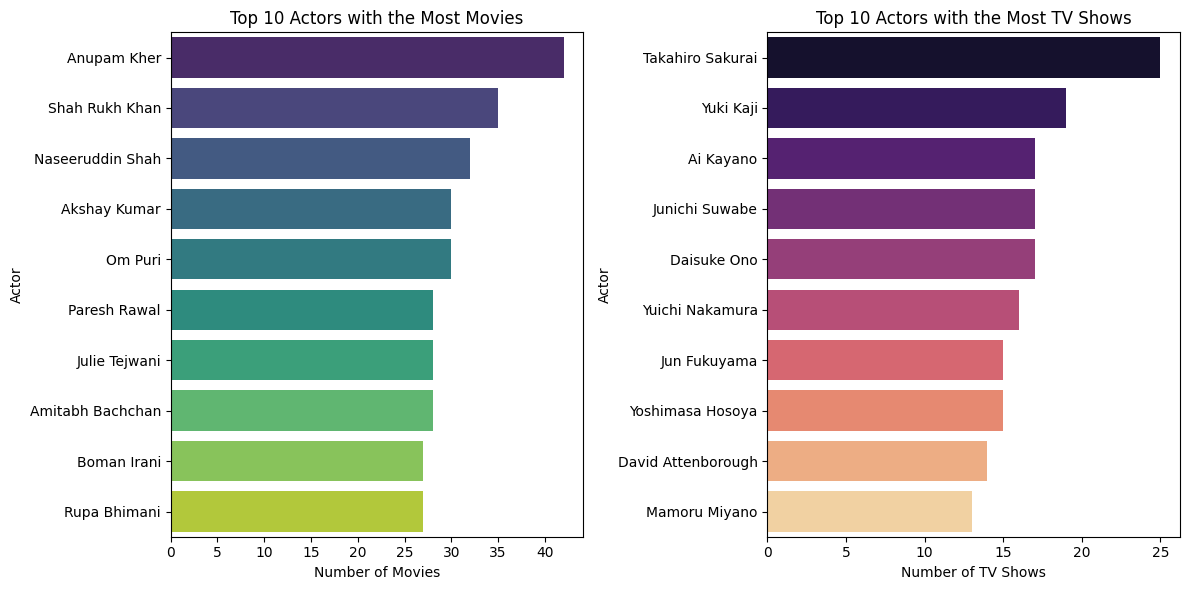

In [15]:
# Split 'cast' into induvidual cast
df['cast'] = df['cast'].str.split(', ')
unnested_cast = df.explode('cast')

# Filter out rows with 'Movies' type and 'Unknown' casts
df_movies = unnested_cast[(unnested_cast['type'] == 'Movie') & (unnested_cast['cast'] != 'Unknown')]

# Count the actors and select top 10
top10_actors_movies = df_movies['cast'].value_counts().head(10)

# Convert to data frame
top10_actors_movies = top10_actors_movies.reset_index()

# Create subplot for the top 10 actors with the most movies 
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x= 'count', y= 'cast', data = top10_actors_movies, hue = 'cast', palette = 'viridis', legend = False)
plt.title('Top 10 Actors with the Most Movies')
plt.xlabel('Number of Movies')
plt.ylabel('Actor')

# Filter out rows with 'TV Show' type and 'Unknown' actors
df_tv_shows = unnested_cast[(unnested_cast['type'] == 'TV Show') & (unnested_cast['cast'] != 'Unknown')]

top10_actors_tv_shows = df_tv_shows['cast'].value_counts().head(10)

top10_actors_tv_shows = top10_actors_tv_shows.reset_index()

plt.subplot(1,2,2)
sns.barplot(x = 'count', y= 'cast', data = top10_actors_tv_shows, hue = 'cast', palette = 'magma', legend = False)
plt.title('Top 10 Actors with the Most TV Shows')
plt.xlabel('Number of TV Shows')
plt.ylabel('Actor')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


Observations:
- Anupam Kher has the highest number of movies, which is 42
- Takahiro Sakurai has the highest number of TV shows, which is 25

Recommendation:
- Netflix should consider collabotare and partnerships with the directors and actors who appear most frequently on the platform as their popularity may attract and retain many viewers.
- Netflix can also encourage collaborations between these top actors and top directors to produce high quality movies or TV shows that increase audience interest.

Top 10 countries with the most Netflix content

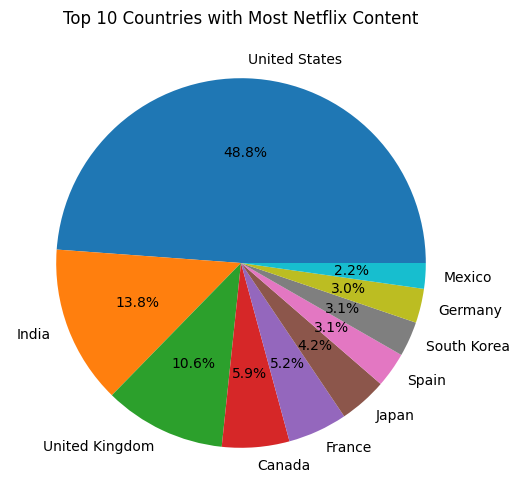

In [16]:
# Split 'country' column into individual element
df['country'] = df['country'].str.split(', ')
unnested_country = df.explode('country')

# Filter out the 'Unknown' country
df_countries = unnested_country[unnested_country['country'] != 'Unknown']

# Count the countries and select the top 10
top10_countries = df_countries['country'].value_counts().head(10).reset_index()

# Create pie chart for the top 10 countries with most Netflix content
plt.figure(figsize = (10, 6))
plt.pie(top10_countries['count'], labels = top10_countries['country'], autopct = '%1.1f%%')
plt.title('Top 10 Countries with Most Netflix Content')
plt.show()

Observations:
- United State has the larger number of titles (48.8%) compared to other countries
- India (13.8%) and the United Kingdom (10.6%) also show a strong content presence on Netflix

Recommendations:
- Netflix can priotize these countries for the future original productions and marketing campaigns, as thay already show strong content output and audience demand.
- Netflix should also try to add more content from countries with fewer titles to improve global variety and attract new audiences.


Time period have the most Netflix titles

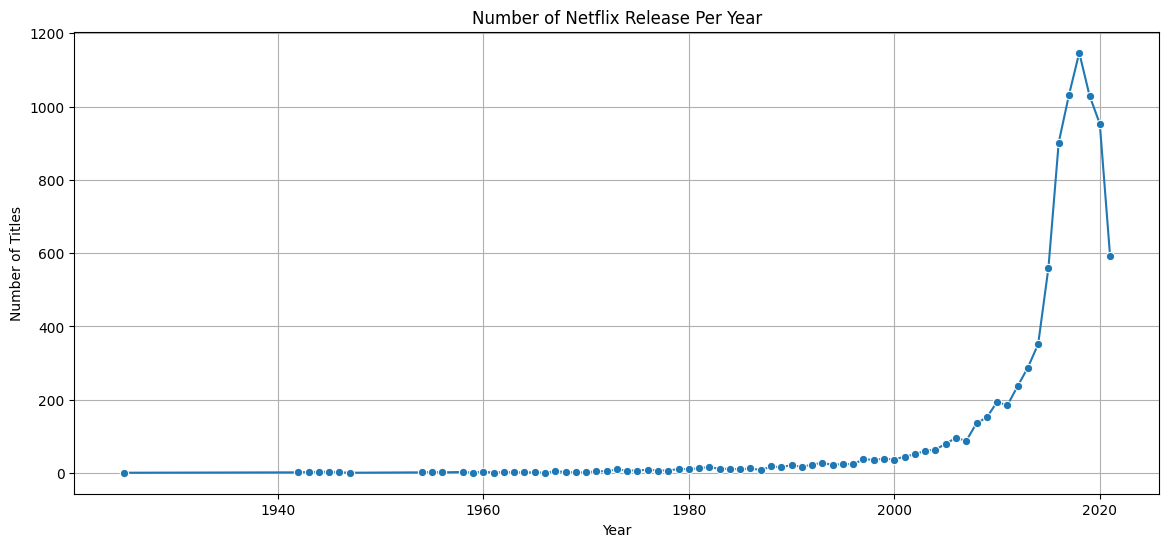

In [17]:
# Count the number of titles by year
release_year_counts = df['release_year'].value_counts().sort_index()

# Create line graph for the number of titles per year
plt.figure(figsize=(14,6))
sns.lineplot(x = release_year_counts.index, y = release_year_counts.values, marker = 'o')
plt.title("Number of Netflix Release Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()

Observations:
- The number of Netflix titles grew rapidly from 2014 to 2018, showing a strong expansion phase in content production
- Starting from 2019, the number of titles released each year began to decline, likely due to market saturation and competition from other platform

C:\Users\60115\AppData\Local\Temp\ipykernel_27992\2688062941.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period1['genre'] = df_period1['listed_in'].str.split(', ')
C:\Users\60115\AppData\Local\Temp\ipykernel_27992\2688062941.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_period['genre'] = df_period['listed_in'].str.split(', ')


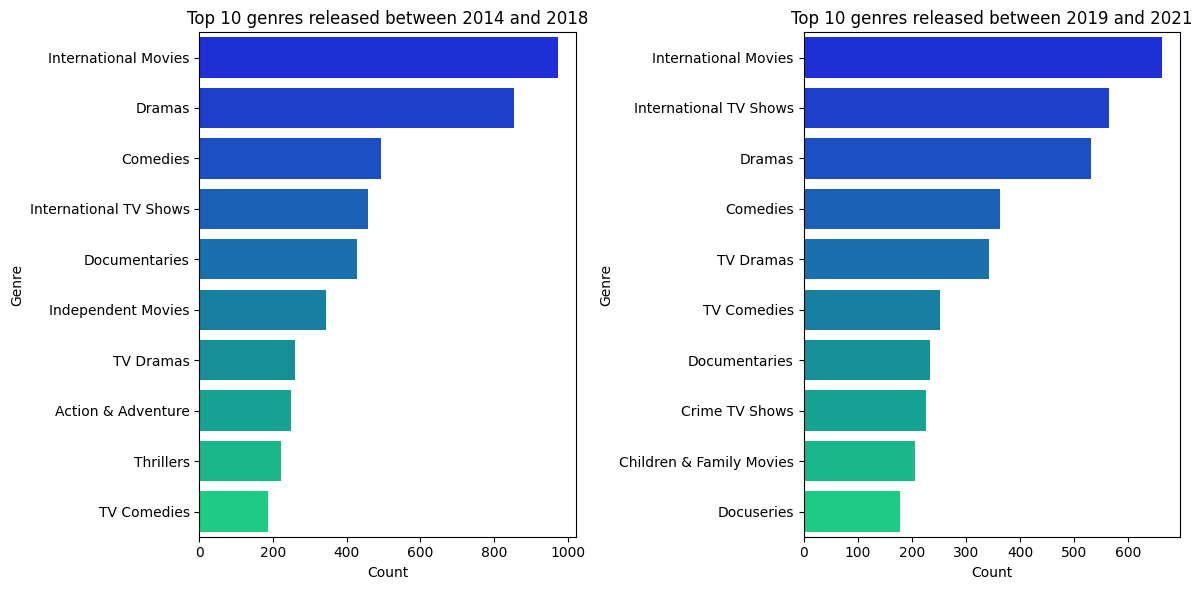

In [18]:
# Filter titles released between 2016 and 2018
df_period1 = df[(df['release_year'] >= 2016) & (df['release_year'] <= 2018)]

# Split 'listed_in' into individual genres
df_period1['genre'] = df_period1['listed_in'].str.split(', ')
df_period1 = df_period1.explode('genre')

# Count the genres and select top 10
top10_genres1 = df_period1['genre'].value_counts().head(10)
top10_genres1 = top10_genres1.reset_index()

# Create the bar chart for the top 10 genres released between 2014 and 2018
plt.figure(figsize = (12,6))
plt.subplot(1,2,1)
sns.barplot(x = 'count', y= 'genre', data = top10_genres1, hue = 'genre', palette = 'winter', legend = False)
plt.title('Top 10 genres released between 2014 and 2018')
plt.xlabel('Count')
plt.ylabel('Genre')

# Filter titles released between 2019 and 2021
df_period = df[(df['release_year'] >= 2019) & (df['release_year'] <= 2021)]

# Split 'listed_in' into individual genres
df_period['genre'] = df_period['listed_in'].str.split(', ')
df_period = df_period.explode('genre')

# Count the genres and select top 10
top10_genres = df_period['genre'].value_counts().head(10)
top10_genres = top10_genres.reset_index()

# Create the bar chart for the top 10 genres released between 2019 and 2021
plt.subplot(1,2,2)
sns.barplot(x = 'count', y= 'genre', data = top10_genres, hue = 'genre', palette = 'winter', legend = False)
plt.title('Top 10 genres released between 2019 and 2021')
plt.xlabel('Count')
plt.ylabel('Genre')

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()

Observations:
- The analysis uses two equal 3-year periods to ensure a fair comparison
- From 2014 to 2018, Netflix more focus on movie related genres
- From 2019 to 2021, Netflix more focus on TV show genres
- From 2019 to 2021, Thrillers, Action & Adventure and Independent Movies genres missing from the top genres.

Recommendation:
- Netflix can allocate 15% of content budget to genres like Thrillers, Action & Adventure and Independent Movies, attracting audiences who prefer these styles.
- Netflix should analyze viewer trends across the 2014 to 2018 growth period to identify which genres drove high retention and priotize these similar contents in the future.

TARGET AUDIENCE:
• Adults: 4,009 titles (45.5%)
• Teens: 2,650 titles (30.1%)
• Family: 1,411 titles (16.0%)
• Kids: 641 titles (7.3%)
• Other: 96 titles (1.1%)


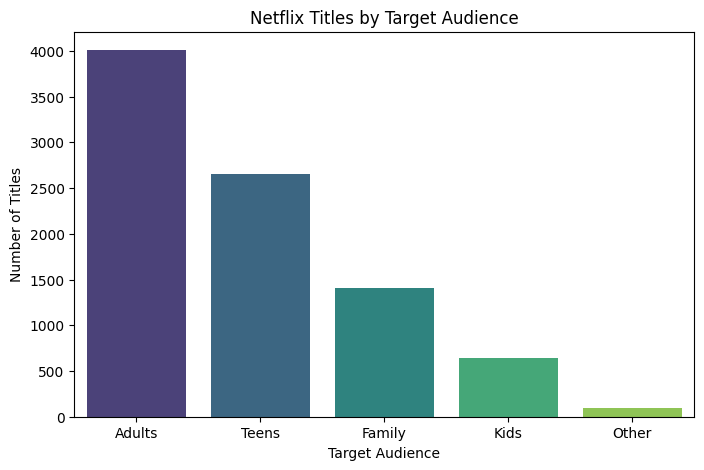

In [19]:
# Define rating group into target audience segments
rating_groups = {
    'Adults': ['TV-MA', 'R', 'NC-17'],
    'Teens': ['TV-14', 'PG-13'],
    'Family': ['TV-PG', 'PG', 'G', 'TV-G'],
    'Kids': ['TV-Y', 'TV-Y7']
}

# Group ratings by target audience
df['target_audience'] = 'Other'
for group, ratings in rating_groups.items():
    for rating in ratings:
        df.loc[df['rating'] == rating, 'target_audience'] = group

# Display the number of titles by target audience and their percentage
print('TARGET AUDIENCE:')
audience_counts = df['target_audience'].value_counts()
for audience, count in audience_counts.items():
    print(f"• {audience}: {count:,} titles ({count/len(df)*100:.1f}%)")

# Create bar chart for the number of titles by target audience
plt.figure(figsize=(8,5))
sns.barplot(x = audience_counts.index, y = audience_counts.values, hue = audience_counts.index, palette="viridis", legend = False)
plt.title("Netflix Titles by Target Audience")
plt.xlabel("Target Audience")
plt.ylabel("Number of Titles")
plt.show()

Observations:
- Adults category is is the largest audience group on Netflix, making up 45.5% of total titles
- Teens audience has the second highest number of titles, which is 2,650 titles (30.1%)
- Family and Kids audience group have fewer titles compared to adult category content

Recommendations:
- Netflix should prioritizes adult audiences for higher subscriber retention. Netflix could offer bundle deals, seasonal promotions or loyalty rewards to improve retention among adult viewers
- Teen genres such as coming of age drama, school theme series and young adult romances are increasingly popular. Netflix can consider investing these genres to attract younger audiences who may become future subscribers.
- Netflix can increase the amount of Family and Kids content by adding 10-15% more titles in these segments to attract and capture more household subscriptions.
